## Preceptrón Adaline. Regresión lineal

En el perceptrón adaline la función de activación del perceptrón es la función identidad $f(x)=x$, por lo tanto la salida del perceptrón es un valor real. Por tanto, podemos entrenar al perceptrón para predecir valores. El caso más sencillo es un perceptrón con una entrada: ![Adaline](adaline.jpg)

Primero vamos a entrenar un perpectrón con una entrada para ajustarse a los siguientes datos:

|x|y|
|---|---| 
1|1
2|3
4|3

En esta práctica vamos a utilizar la librería numpy para representar vectores. Es muy útil cuando trabajamos con vectores porque tiene algunas funciones como el producto de vectores que facilitan la implementación del algoritmo de aprendizaje.

In [1]:
import numpy as np

In [2]:
a = np.array([0, 2, 3])
b = np.array([1, 2, 1])
# Producto escalar de dos vectores
c = np.dot(a,b)
print(c)

7


Con los arrays de numpy podemos hacer operaciones elemento a elemento. Además, el acceso a las matrices es diferente a Python estándar y podemos acceder a columnas completas.

In [3]:
a = np.array([0, 2, 3])
b = np.array([1, 2, 1])
print((a-b))
print((a-b)**2)

[-1  0  2]
[1 0 4]


Multiplicar dos vectores elemento a elemento:

In [4]:
c = np.multiply(a,b)
print(c)

[0 4 3]


Sumar los elementos de un vector:

In [5]:
c = np.sum(a)
print(c)

5


Accecer a elementos de una matriz:

In [6]:
X = np.array([[0,1],[1,2],[3,0]])
print(X[:,1]) #todos los elementos de las filas de la columna 1 de la matriz
print(X[2,0])

[1 2 0]
3


Primero vamos a definir los valores de entrada y de salida como arrays. En el vector de entrada añadimos una columna de unos correspondiente al valor de $x_0$.

In [7]:
X = np.array([[1,1],[1,2],[1,4]])
y = np.array([1, 3, 3])

Crea una función perceptron que tome como parámetros un vector de pesos $w$, un vector de entrada $x$ y devuelva el valor de salida $y$ del perceptrón. El valor de salida del perceptrón con w_ini = [-1, -1] es -2.

In [8]:
def perceptron(w,x):
    return np.dot(w,x)
w_ini = [-1, -1]
print(perceptron(w_ini, X[0]))

-2


Completa la función coste que tiene como parámetros de entrada una matriz con los datos de entrada X, el vector con las salidas y y u vector de pesos de un perceptrón. La función coste calcula el error cuadrático medio entre la salida y la salida del perceptrón para todos los vectores de la matriz de datos. Siendo $m$ el número de datos de la matriz $X$ y $f(x)$ la salida del perceptrón:
\begin{equation}
Err = \frac{1}{2m}\sum\left(f\left(x\right) - y\right)^2
\end{equation}

In [9]:
def coste(X, y, w):
    loss = 0
    for i in range(len(X)):
        loss += (perceptron(w,X[i])-y[i])**2
    return loss * 1/(2*len(X))
# El valor del coste con w_ini = [-1, -1] es 18.15
print(coste(X,y, w_ini))

18.166666666666668


Para encontrar los parámetros del perpectrón que mejor se ajusten a los datos vamos a utilizar el algoritmo del descenso por gradiente. Para poder utilizarlo necesitamos los gradientes de la función de coste con respecto a cada parámetro del perceptrón. Completa la función gradientes en la que se devuelve el valor de los gradientes de $w_0$ y$w_1$:

\begin{equation}
\frac{\partial J}{\partial w_0} = \frac{1}{m} \sum_{x, y \in D_{train}} \left(\left(w_0x_0 \text{+}w_1x_1\right) - y \right) x_0  \nonumber 
\end{equation}

\begin{equation}
\frac{\partial J}{\partial w_1} = \frac{1}{m} \sum_{x, y \in D_{train}} \left(\left(w_0x_0 \text{+}w_1x_1\right) - y \right) x_1 \nonumber
\end{equation}

In [10]:
def gradientes(X,y,w):
    gradientes = np.zeros(len(w))
    m = len(X)
    for i in range(len(w)):
        gradientes[i] = (1/m) * np.sum(((np.dot(X, w) - y) * X[:, i]))
    return gradientes

In [11]:
#El valor de los gradientes es [ -5.66666667 -15.66666667]
X = np.array([[1,1],[1,2],[1,4]])
y = np.array([1, 3, 3])
w_ini = [-1, -1]
print(gradientes(X,y,w_ini))

[ -5.66666667 -15.66666667]


Crea la función de descenso por gradiente que tenga como parámetros de entrada la matriz X, el vector y, un vector de pesos incial del perceptrón, el valor del ratio de aprendizaje y el número de iteraciones y devuelva un vector con los valores de coste en todas las iteraciones y el vector de pesos aprendido.

In [12]:
def DescensoGradiente(X, y, w_ini, alpha = 0.1, iters = 100):
    w = w_ini
    Loss = []
    for i in range(iters):
        Loss.append(coste(X,y,w))
        w -= alpha * gradientes(X,y,w)
    return Loss, w     

Ejecuta el algoritmo del descenso por gradiente e imprime los valores de la función de perdida. Si los valores descienden y convergen en un mínimo, entonces el algoritmo funciona correctamente.

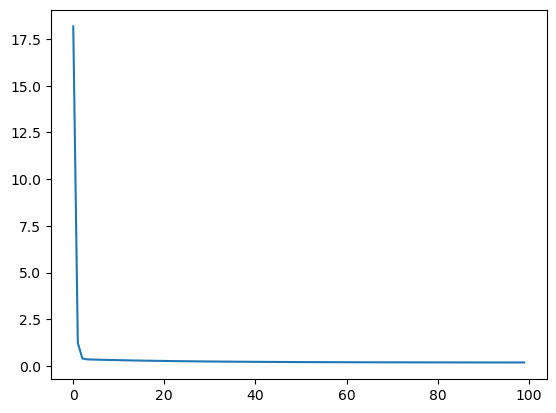

In [13]:
import matplotlib.pyplot as plt 
w_ini = [-1, -1]
L, w = DescensoGradiente(X, y, w_ini)
plt.plot(L)
plt.show()

Imprime los valores de los pesos del perceptrón y comprueba que coinciden con los valores obtenidos por la ecuación normal de Gauss que se encuentra en la siguiente celda:

In [14]:
print(w)

[0.82563289 0.63125528]


In [15]:
from numpy.linalg import inv
w_opt = np.matmul(np.matmul(inv(np.matmul(X.T, X)),X.T), y)
print(w_opt)

[1.         0.57142857]


Prueba con diferentes valores de ratio de aprendizaje alpha y número de iteraciones para comprobar si el algoritmo de descenso por gradiente converge y se acerca más a los valores óptimos que se obtienen con la ecuación normal.

In [16]:
L, w = DescensoGradiente(X, y, w_ini,0.05,1000)
print(w)

[0.99994189 0.57144851]


## Predicción del precio de los diamantes

Este conjunto de datos clásico contiene los precios y otros atributos de casi 54.000 diamantes.
![](diamante.jpg)

Los atributos son los siguientes:

- *Quilates* (0,2-5,01): El quilate es el peso físico del diamante medido en quilates métricos. Un quilate equivale a 0,20 gramos y se subdivide en 100 puntos.
- *Talla* (0-4): La calidad de la talla. Cuanto más preciso sea el corte del diamante, más cautivador será el diamante a la vista y, por tanto, de alta calidad.
- *Color* (0-7)): El color de los diamantes de calidad gema se presenta en muchas tonalidades. Va desde el incoloro hasta el amarillo claro o el marrón claro. Los diamantes incoloros son los más raros. Otros colores naturales (azul, rojo, rosa, por ejemplo) se conocen como "de fantasía", y su clasificación de color es diferente a la de los diamantes blancos incoloros.
- *Claridad* (0-6): Los diamantes pueden tener características internas conocidas como inclusiones o externas conocidas como manchas. Los diamantes sin inclusiones o imperfecciones son raros; sin embargo, la mayoría de las características sólo pueden verse con aumento.
- *Profundidad* (43-79): Es el porcentaje de profundidad total que equivale a z / media(x, y) = 2 * z / (x + y). La profundidad del diamante es su altura (en milímetros) medida desde el culet (punta inferior) hasta la tabla (superficie plana, superior), tal como se refiere en el diagrama etiquetado anterior.
- *tabla* (43-95): Es la anchura de la parte superior del diamante en relación con el punto más ancho. Le da al diamante un fuego y un brillo impresionantes al reflejar las luces en todas las direcciones, lo cual, al ser visto por un observador, parece lustroso.
- *x* (0 - 10.74): Longitud del diamante (en mm)
- *y* (0 - 58.9): Anchura del diamante (en mm)
- *z* (0 - 31.8): Profundidad del diamante (en mm)

- *precio* ($326 - $18826): Es el precio del diamante en dólares estadounidenses. 

Vamos a entrenar un perceptrón Adaline con 9 entradas que sea capaz de predecir el precio de un diamante.

In [17]:
import pandas as pd 
from sklearn.utils import shuffle
data = pd.read_csv("diamates.csv")
data = data.drop(['Unnamed: 0'], axis=1)
data = shuffle(data)
data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000
mean,0.797617,2.904469,4.353967,3.051661,61.749743,57.455852,3930.513680,5.731441,5.733764,3.539994
std,0.473759,1.116232,1.816157,1.647066,1.420093,2.226169,3987.145802,1.119369,1.116891,0.702085
min,0.200000,0.000000,0.000000,0.000000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,2.000000,3.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,4.000000,3.000000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,6.000000,4.000000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,4.000000,7.000000,7.000000,73.600000,79.000000,18823.000000,10.740000,31.800000,31.800000


In [18]:
data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
44912,0.68,0,4,2,58.0,71.0,1633,5.85,5.70,3.35
41437,0.41,4,4,6,61.8,55.0,1230,4.78,4.76,2.95
13027,0.36,3,5,2,61.1,59.0,600,4.55,4.59,2.79
53049,0.70,1,3,5,60.5,62.0,2611,5.66,5.74,3.45
41945,0.40,3,5,6,60.2,59.0,1263,4.74,4.76,2.86
46963,0.57,1,4,3,58.2,66.0,1816,5.34,5.45,3.14
35582,0.31,2,3,6,63.1,57.0,907,4.31,4.25,2.70
52158,0.70,4,4,2,61.6,56.0,2478,5.69,5.73,3.52
50238,0.50,2,5,7,61.4,60.0,2238,5.07,5.10,3.12
25749,2.43,3,2,1,62.2,60.0,14727,8.59,8.53,5.33


In [19]:
y = np.array(data['price'])
data = data.drop(['price'], axis=1)
X = np.array(data)

Imprimimos la gráfica Quilates - precio

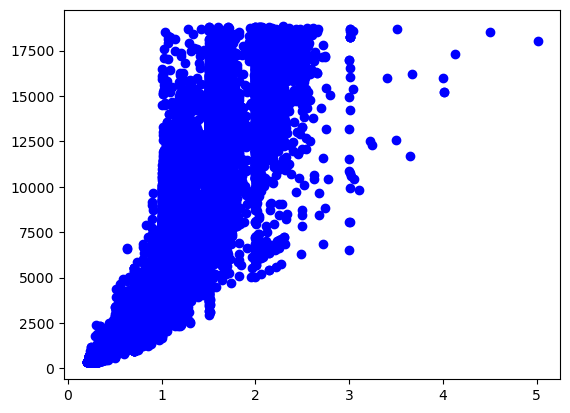

In [20]:
import matplotlib.pyplot as plt
plt.plot(X[:,0],y, 'bo')
plt.show()

En la siguiente celda vamos a *normalizar* los valores de las columnas de la matriz X. Esto se hace para que el algoritmo de descenso por gradiente pueda converger más fácil. Debido a que el ratio de aprendizaje es común para todas las variables del problema, si en nuestro conjunto de datos existen columnas (variables) que tienen rango diferente, puede ocurrir que  el avance (alpha*gradiente) en alguna variable sea demasiado grande y otras variables sea pequeño y por tanto el algoritmo se queda oscilando sin llegar a converger al mínimo. Al normalizar todas las variables a un rango similar se evita este problema y el descenso por gradiente converge más fácilmente.

La normalización que utilizamos se llama normalización por la media. A los valores se les resta la media y se divide por la desviación típica. 
\begin{equation}
x_i = \frac{x_i-mean(x)}{std(x)}
\end{equation}
Los valores de la variable transformada estén casi todos entre -1 y 1 y la desviación típica dela nueva variable es 1.

In [21]:
for c in range(len(X[0])):
    X[:,c] = (X[:,c]-np.mean(X[:,c]))/np.std(X[:,c])

Añadimos la columna de unos que representa el término de bias $x_0$ del perceptrón:

In [22]:
m = len(X)
X = np.c_[np.ones(m), X ]

Modifica tus funciones gradientes y DescensoGradiente para que pueda trabajar con más 2 variables:

In [23]:
def gradientes(X,y,w):
    gradientes = np.zeros(len(w))
    m = len(X)
    for i in range(len(w)):
        gradientes[i] = (1/m) * np.sum(((np.dot(X, w) - y) * X[:, i]))
    return gradientes

def DescensoGradiente(X, y, w_ini, alpha = 0.1, iters = 100):
    w = w_ini
    Loss = []
    for i in range(iters):
        Loss.append(coste(X,y,w))
        w -= alpha * gradientes(X,y,w)
    return Loss, w

Como tenemos muchos datos vamos a crear dos conjuntos uno de entrenamiento y otro de test con 1000 ejemplos cada uno.

In [24]:
mtrain = 1000
mtest = 1000
X_train = X[:mtrain,:]
y_train = y[:mtrain]

X_test = X[mtrain+1:mtrain+mtest,:]
y_test = y[mtrain+1:mtrain+mtest]

Ejecuta el descenso por gradiente y comprueba que el valor del error desciende a lo largo de las iteraciones.

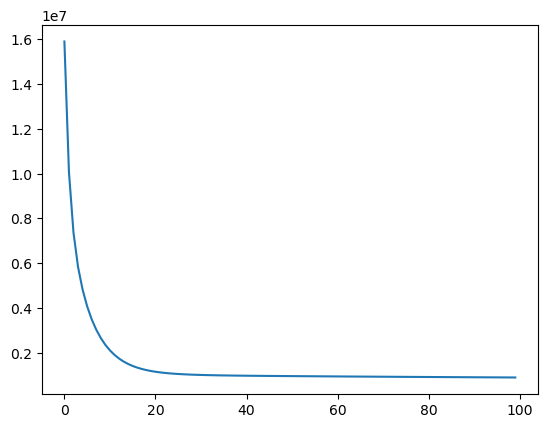

In [25]:
w_ini = [0 for i in range(len(X[0]))]
L, w = DescensoGradiente(X_train, y_train, w_ini)
import matplotlib.pyplot as plt 
plt.plot(L)
plt.show()

Comparamos los valores de los pesos obtenidos con los valores obtenidos utilizando el método normal de Gauss:

In [26]:
print(w)
from numpy.linalg import inv
w_opt = np.matmul(np.matmul(inv(np.matmul(X_train.T, X_train)),X_train.T), y_train)
print(w_opt)

[3866.04190716 2063.6327253   117.8226997   491.09936828  954.09404495
 -113.56857523   17.93239074  706.00658463  754.5576232   638.89326072]
[  3882.22322537   5270.8855572     179.37161059    566.60560572
    835.11334488   1553.57343944     34.65797958   3026.73749951
   9833.18161583 -14201.20975509]


Utilizando la función perceptron calcula el precio predicho para el conjunto de test con los parámetros $w_opt$ que has obtenido con la ecuación normal y llama al vector de predicciones y_p. Después obten las predicciones con los parámetros obtenidos con el descenso por gradiente y llamalos en y_pdg. En la siguiente celda se muestras los precios reales, los valores predichos por nuestro perceptrón y por el perceptrón con los pesos obtenidos por la ecuación normal en la gráfica quilates-precio:

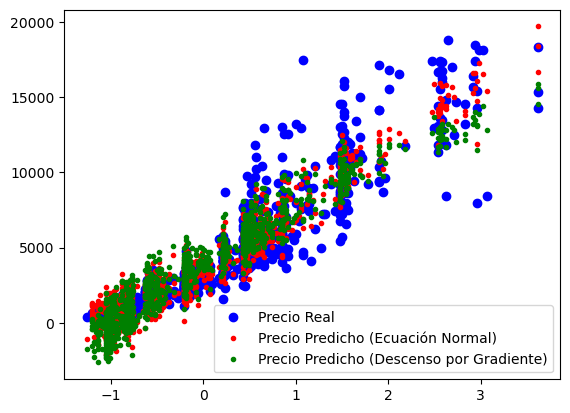

In [27]:
w_opt = np.matmul(np.matmul(inv(np.matmul(X_train.T, X_train)),X_train.T), y_train)
y_p = perceptron(X_test, w_opt)

_, w_pdg = DescensoGradiente(X_train, y_train, w_ini)
y_pdg = perceptron(X_test, w_pdg)

plt.plot(X_test[:,1], y_test, 'bo', label='Precio Real')
plt.plot(X_test[:,1], y_p, 'r.', label='Precio Predicho (Ecuación Normal)')
plt.plot(X_test[:,1], y_pdg, 'g.', label='Precio Predicho (Descenso por Gradiente)')
plt.legend()
plt.show()

*Extra*: Ya hemos dicho que es más difícil hacer que el algoritmo del descenso por gradiente converja cuando los datos no están normalizados, sin embargo en este problema se puede conseguir. Utilizando el conjunto de datos sin normalizar, encuentra los valores de alpha y número de iteraciones que hagan converger. ¿Qué valores de pesos del perceptrón obtienes?